# 라이브러리

In [1]:
import pandas as pd

# 데이터

In [2]:
df = pd.read_csv('BIT_2023_1차.csv')
df.head(3)

,time,Open,High,Low,Close,Volume,returns,volatility,price,quote_qty,is_buyer_maker,quote_qty_cal
0,2023-01-01 0:00,16537.5,16540.9,16504.0,16527.0,5381.399,NaN,NaN,16524.52574,7264.129209,16494,88925066.30
1,2023-01-01 1:00,16527.1,16554.3,16524.1,16550.4,3210.826,0.001416,NaN,16537.21599,6819.889969,8705,53098123.05
2,2023-01-01 2:00,16550.5,16557.1,16534.8,16542.4,2399.668,-0.000483,NaN,16545.81814,6030.420093,8468,39704470.32


# Stochastic Oscillator

일반적으로는 14와 3을 사용한다. 
- period의 경우, 주가 데이터의 기간에 따라 최적의 값을 설정할 수 있다. 예를 들어, 10일, 30일, 50일 등 다양한 기간을 선택할 수 있다.
- m은 %K의 이동평균을 계산하는데 사용되는 기간이다. 따라서, 2, 5, 10 등 다른 값을 설정할 수도 있다.
> 주가 데이터의 특성과 분석 목적에 따라 period와 m의 값을 조정하여 최적의 결과를 얻을 수 있다

## 1) period = 14, m = 3

In [3]:
# Stochastic Oscillator 함수
def cal_stoc_os(df, period=14, m=3): # period = 14 or 20
    
    # 최근 N일간의 최고가(H)와 최저가(L)
    df['highest_high'] = df['High'].rolling(window = period).max()
    df['lowest_low'] = df['Low'].rolling(window = period).min()
    
    # %K 계산
    df['%K'] = (df['Close'] - df['lowest_low']) / (df['highest_high'] - df['lowest_low']) * 100
    
    # %D 계산
    df['%D'] = df['%K'].rolling(m).mean()

    return df

In [4]:
# Stochastic Oscillator 계산 실행
df = cal_stoc_os(df)

In [5]:
# 결과 출력
print(df[['time', '%K', '%D']])

                  time         %K         %D
0      2023-01-01 0:00        NaN        NaN
1      2023-01-01 1:00        NaN        NaN
2      2023-01-01 2:00        NaN        NaN
3      2023-01-01 3:00        NaN        NaN
4      2023-01-01 4:00        NaN        NaN
...                ...        ...        ...
8755  2023-12-31 19:00  59.875948  62.067090
8756  2023-12-31 20:00  47.162162  57.553939
8757  2023-12-31 21:00  31.210526  46.082879
8758  2023-12-31 22:00  21.797164  33.389951
8759  2023-12-31 23:00  31.333967  28.113886

[8760 rows x 3 columns]


In [6]:
print("p = 14, m = 3일 때의 %K 결측치: ", df['%K'].isna().sum())
print("p = 14, m = 3일 때의 %D 결측치: ", df['%D'].isna().sum())

p = 14, m = 3일 때의 %K 결측치:  128
p = 14, m = 3일 때의 %D 결측치:  144


## 2) period = 20, m = 3

In [7]:
# Stochastic Oscillator 함수
def cal_stoc_os(df, period=20, m=3):
    
    # 최근 N일간의 최고가(H)와 최저가(L)
    df['highest_high'] = df['High'].rolling(window = period).max()
    df['lowest_low'] = df['Low'].rolling(window = period).min()
    
    # %K 계산
    df['%K'] = (df['Close'] - df['lowest_low']) / (df['highest_high'] - df['lowest_low']) * 100
    
    # %D 계산
    df['%D'] = df['%K'].rolling(m).mean()

    return df

In [8]:
# Stochastic Oscillator 계산 실행
df = cal_stoc_os(df)

In [9]:
print("p = 20, m = 3일 때의 %K 결측치: ", df['%K'].isna().sum())
print("p = 20, m = 3일 때의 %D 결측치: ", df['%D'].isna().sum())

p = 20, m = 3일 때의 %K 결측치:  173
p = 20, m = 3일 때의 %D 결측치:  187


- 경우 1보다 결측치가 늘어났다.

## 3) period = 14, m = 2

In [10]:
# Stochastic Oscillator 함수
def cal_stoc_os(df, period=14, m=2):
    
    # 최근 N일간의 최고가(H)와 최저가(L)
    df['highest_high'] = df['High'].rolling(window = period).max()
    df['lowest_low'] = df['Low'].rolling(window = period).min()
    
    # %K 계산
    df['%K'] = (df['Close'] - df['lowest_low']) / (df['highest_high'] - df['lowest_low']) * 100
    
    # %D 계산
    df['%D'] = df['%K'].rolling(m).mean()

    return df

In [11]:
# Stochastic Oscillator 계산 실행
df = cal_stoc_os(df)

In [12]:
print("p = 14, m = 2일 때의 %K 결측치: ", df['%K'].isna().sum())
print("p = 14, m = 2일 때의 %D 결측치: ", df['%D'].isna().sum())

p = 14, m = 2일 때의 %K 결측치:  128
p = 14, m = 2일 때의 %D 결측치:  136


- 경우 1보다 결측치가 줄어들었다

## 4) period = 20, m = 2

In [13]:
# Stochastic Oscillator 함수
def cal_stoc_os(df, period=20, m=2):
    
    # 최근 N일간의 최고가(H)와 최저가(L)
    df['highest_high'] = df['High'].rolling(window = period).max()
    df['lowest_low'] = df['Low'].rolling(window = period).min()
    
    # %K 계산
    df['%K'] = (df['Close'] - df['lowest_low']) / (df['highest_high'] - df['lowest_low']) * 100
    
    # %D 계산
    df['%D'] = df['%K'].rolling(m).mean()

    return df

In [14]:
# Stochastic Oscillator 계산 실행
df = cal_stoc_os(df)

In [15]:
print("p = 20, m = 2일 때의 %K 결측치: ", df['%K'].isna().sum())
print("p = 20, m = 2일 때의 %D 결측치: ", df['%D'].isna().sum())

p = 20, m = 2일 때의 %K 결측치:  173
p = 20, m = 2일 때의 %D 결측치:  180


- 경우 2보다는 결측치가 줄어들었지만, 경우 1과 3보다는 결측치가 많다

-> period를 늘림에 따라 결측치는 증가한다. period는 14로 하고, m을 어떻게 할까?

# 경우의 수 시각화

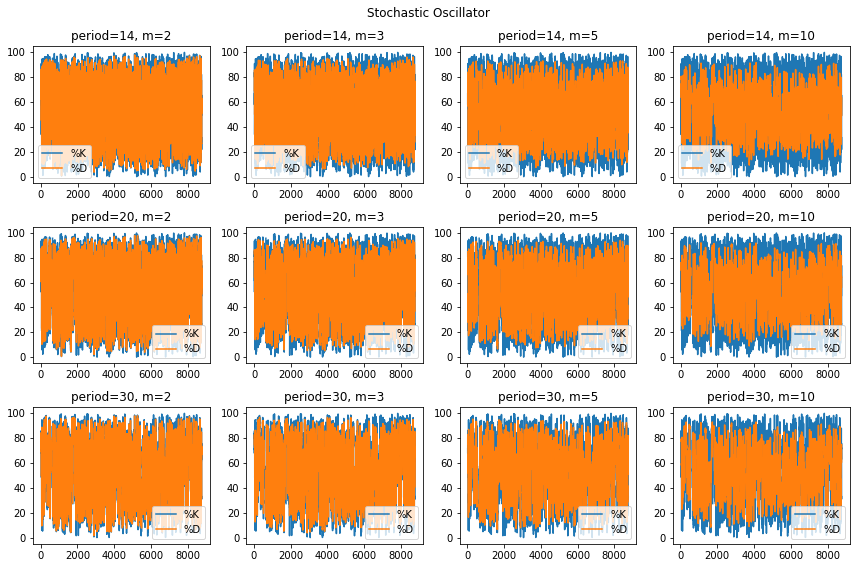

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def cal_stoc_os(df, period=14, m=3):
    df['highest_high'] = df['High'].rolling(window=period).max()
    df['lowest_low'] = df['Low'].rolling(window=period).min()
    df['%K'] = (df['Close'] - df['lowest_low']) / (df['highest_high'] - df['lowest_low']) * 100
    df['%D'] = df['%K'].rolling(m).mean()
    return df

# period와 m의 다양한 조합 설정
periods = [14, 20, 30]  # 다양한 period
ms = [2, 3, 5, 10]  # 다양한 m

# 그래프 그리기
fig, axs = plt.subplots(len(periods), len(ms), figsize=(12, 8))
fig.suptitle("Stochastic Oscillator")

# period와 m의 조합 -> Stochastic Oscillator 값 계산 & 시각화 진행
for i, period in enumerate(periods):
    for j, m in enumerate(ms):
        df_copy = df.copy()  # df 복사
        df_copy = cal_stoc_os(df_copy, period=period, m=m)  # Stochastic Oscillator 값 계산
        axs[i, j].plot(df_copy['%K'], label='%K')
        axs[i, j].plot(df_copy['%D'], label='%D')
        axs[i, j].set_title(f"period={period}, m={m}")
        axs[i, j].legend()

plt.tight_layout()
plt.show()

# 경우의 수 평가
- 수익률, 변동성, 최대 손실, 승률

In [17]:
# 평가 지표를 저장 딕셔너리
evaluation_results = {}

# 각 조합 평가 지표 계산
for period in periods:
    for m in ms:
        df_copy = df.copy()
        df_copy = cal_stoc_os(df_copy, period=period, m=m)
        
        # 평가 지표 계산 (수익률, 변동성, 최대 손실, 승률)
        returns = df_copy['Close'].pct_change().cumsum().iloc[-1]
        volatility = df_copy['Close'].pct_change().std()
        max_drawdown = (df_copy['Close'].cummax() - df_copy['Close']).max()
        win_rate = (df_copy['%K'] > df_copy['%D']).mean()
        
        # 평가 지표 -> 딕셔너리에 저장
        evaluation_results[(period, m)] = {
            'Returns': returns,
            'Volatility': volatility,
            'Max Drawdown': max_drawdown,
            'Win Rate': win_rate
        }

# 평가 지표를 기준으로 가장 좋은 조합?
best_combination = max(evaluation_results, key=lambda x: evaluation_results[x]['Returns'])

# 결과
print("Evaluation Results:")
for combination, metrics in evaluation_results.items():
    print(f"Period={combination[0]}, m={combination[1]}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

print("Best Combination:")
print(f"Period={best_combination[0]}, m={best_combination[1]}")

Evaluation Results:
Period=14, m=2
Returns: 1.03123125726592
Volatility: 0.004560715399236303
Max Drawdown: 6592.299999999999
Win Rate: 0.5007990867579909

Period=14, m=3
Returns: 1.03123125726592
Volatility: 0.004560715399236303
Max Drawdown: 6592.299999999999
Win Rate: 0.4948630136986301

Period=14, m=5
Returns: 1.03123125726592
Volatility: 0.004560715399236303
Max Drawdown: 6592.299999999999
Win Rate: 0.49166666666666664

Period=14, m=10
Returns: 1.03123125726592
Volatility: 0.004560715399236303
Max Drawdown: 6592.299999999999
Win Rate: 0.4949771689497717

Period=20, m=2
Returns: 1.03123125726592
Volatility: 0.004560715399236303
Max Drawdown: 6592.299999999999
Win Rate: 0.49577625570776257

Period=20, m=3
Returns: 1.03123125726592
Volatility: 0.004560715399236303
Max Drawdown: 6592.299999999999
Win Rate: 0.4906392694063927

Period=20, m=5
Returns: 1.03123125726592
Volatility: 0.004560715399236303
Max Drawdown: 6592.299999999999
Win Rate: 0.488013698630137

Period=20, m=10
Returns: 1

결론: 14와 2를 사용하자